In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [2]:
#pip install -U sentence-transformers

     ---------------------------------------- 0.0/86.0 kB ? eta -:--:--
     ---------------------------------------- 86.0/86.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
     ----------------- ---------------------- 0.5/1.2 MB 11.4 MB/s eta 0:00:01
     ---------------------------------------- 1.2/1.2 MB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 0.0/977.6 kB ? eta -:--:--
     ------------------------------------  962.6/977.6 kB 20.3 MB/s eta 0:00:01
     ------------------------------------- 977.6/977.6 kB 15.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/172.4 MB ? eta -:--:--
     --------------------------------------- 1.0/172.4 MB 32.4 MB/s eta 0:00:06
     --------------------------------------- 1.9/172.4 MB 23.9 MB/s eta 0:00:08
      -------------------------------------- 2.6/17

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\torch-1.12.1-py3.9.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.



In [2]:
data = pd.read_csv('imdb_top_1000.csv')
X = np.array(data.Overview)

In [3]:
data.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [4]:
data = data[['Genre','Overview','Series_Title']]
data.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


In [5]:
data = data.dropna()

In [6]:
text_data = X
#model = SentenceTransformer('distilbert-base-nli-mean-tokens')

model = SentenceTransformer('distilroberta-base')

embeddings = model.encode(text_data, show_progress_bar=True)

No sentence-transformers model found with name C:\Users\acer/.cache\torch\sentence_transformers\distilroberta-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\acer/.cache\torch\sentence_transformers\distilroberta-base were not used when initializing RobertaModel: ['lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [7]:
embed_data = embeddings

In [8]:
X = np.array(embed_data)
#n_comp = 5
pca = PCA(0.95)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4,5,6,7,8,9,...,200,201,202,203,204,205,206,207,208,209
0,0.081756,0.237160,0.858844,-0.449047,0.214997,0.223782,0.096401,-0.301504,-0.007374,-0.398167,...,0.075280,0.030892,-0.073385,0.004322,0.003668,-0.066539,-0.028846,-0.013474,0.021460,-0.044561
1,0.368164,0.493747,-0.153521,0.134788,0.545492,-0.507498,-0.738117,-0.678931,0.113447,-0.292051,...,0.001173,-0.060524,0.074041,0.027919,0.005512,-0.027769,-0.048365,0.019864,-0.003078,-0.006451
2,-0.056837,-0.875855,0.970569,-0.068562,0.246538,-0.281151,-0.155855,-0.739609,-0.418814,-0.152045,...,-0.043790,0.018271,-0.005310,0.037084,-0.058185,-0.070998,0.058541,-0.069041,0.033787,-0.023504
3,0.568604,-0.220231,-0.290460,0.220523,-0.254861,0.031528,-0.536735,-0.434225,-0.291596,-0.183901,...,0.035590,0.057260,-0.083196,0.014060,-0.035832,0.029883,0.012996,-0.000816,-0.072763,0.025322
4,0.306668,0.518403,0.358682,-0.494677,0.634244,0.285577,0.512399,-0.915360,0.046252,0.049418,...,-0.030716,0.010799,0.024191,-0.023017,0.079407,-0.035584,-0.019965,-0.044590,0.030913,0.037618


In [9]:
pca_data.shape

(1000, 210)

In [12]:
Y = np.array(pca_data)

In [14]:
Y.shape

(1000, 210)

In [ ]:
#sns.pairplot(pca_data)

In [15]:
cos_sim_data = pd.DataFrame(cosine_similarity(Y))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
  index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
  movies_recomm =  data['Series_Title'].loc[index_recomm].values
  result = {'Movies':movies_recomm,'Index':index_recomm}
  if print_recommendation==True:
    print('The watched movie is this one: %s \n'%(data['Series_Title'].loc[index]))
    k=1
    for movie in movies_recomm:
      print('The number %i recommended movie is this one: %s \n'%(k,movie))
  if print_recommendation_plots==True:
    print('The plot of the watched movie is this one:\n %s \n'%(data['Overview'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Overview'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  if print_genres==True:
    print('The genres of the watched movie is this one:\n %s \n'%(data['Genre'].loc[index]))
    k=1
    for q in range(len(movies_recomm)):
      plot_q = data['Genre'].loc[index_recomm[q]]
      print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
      k=k+1
  return result

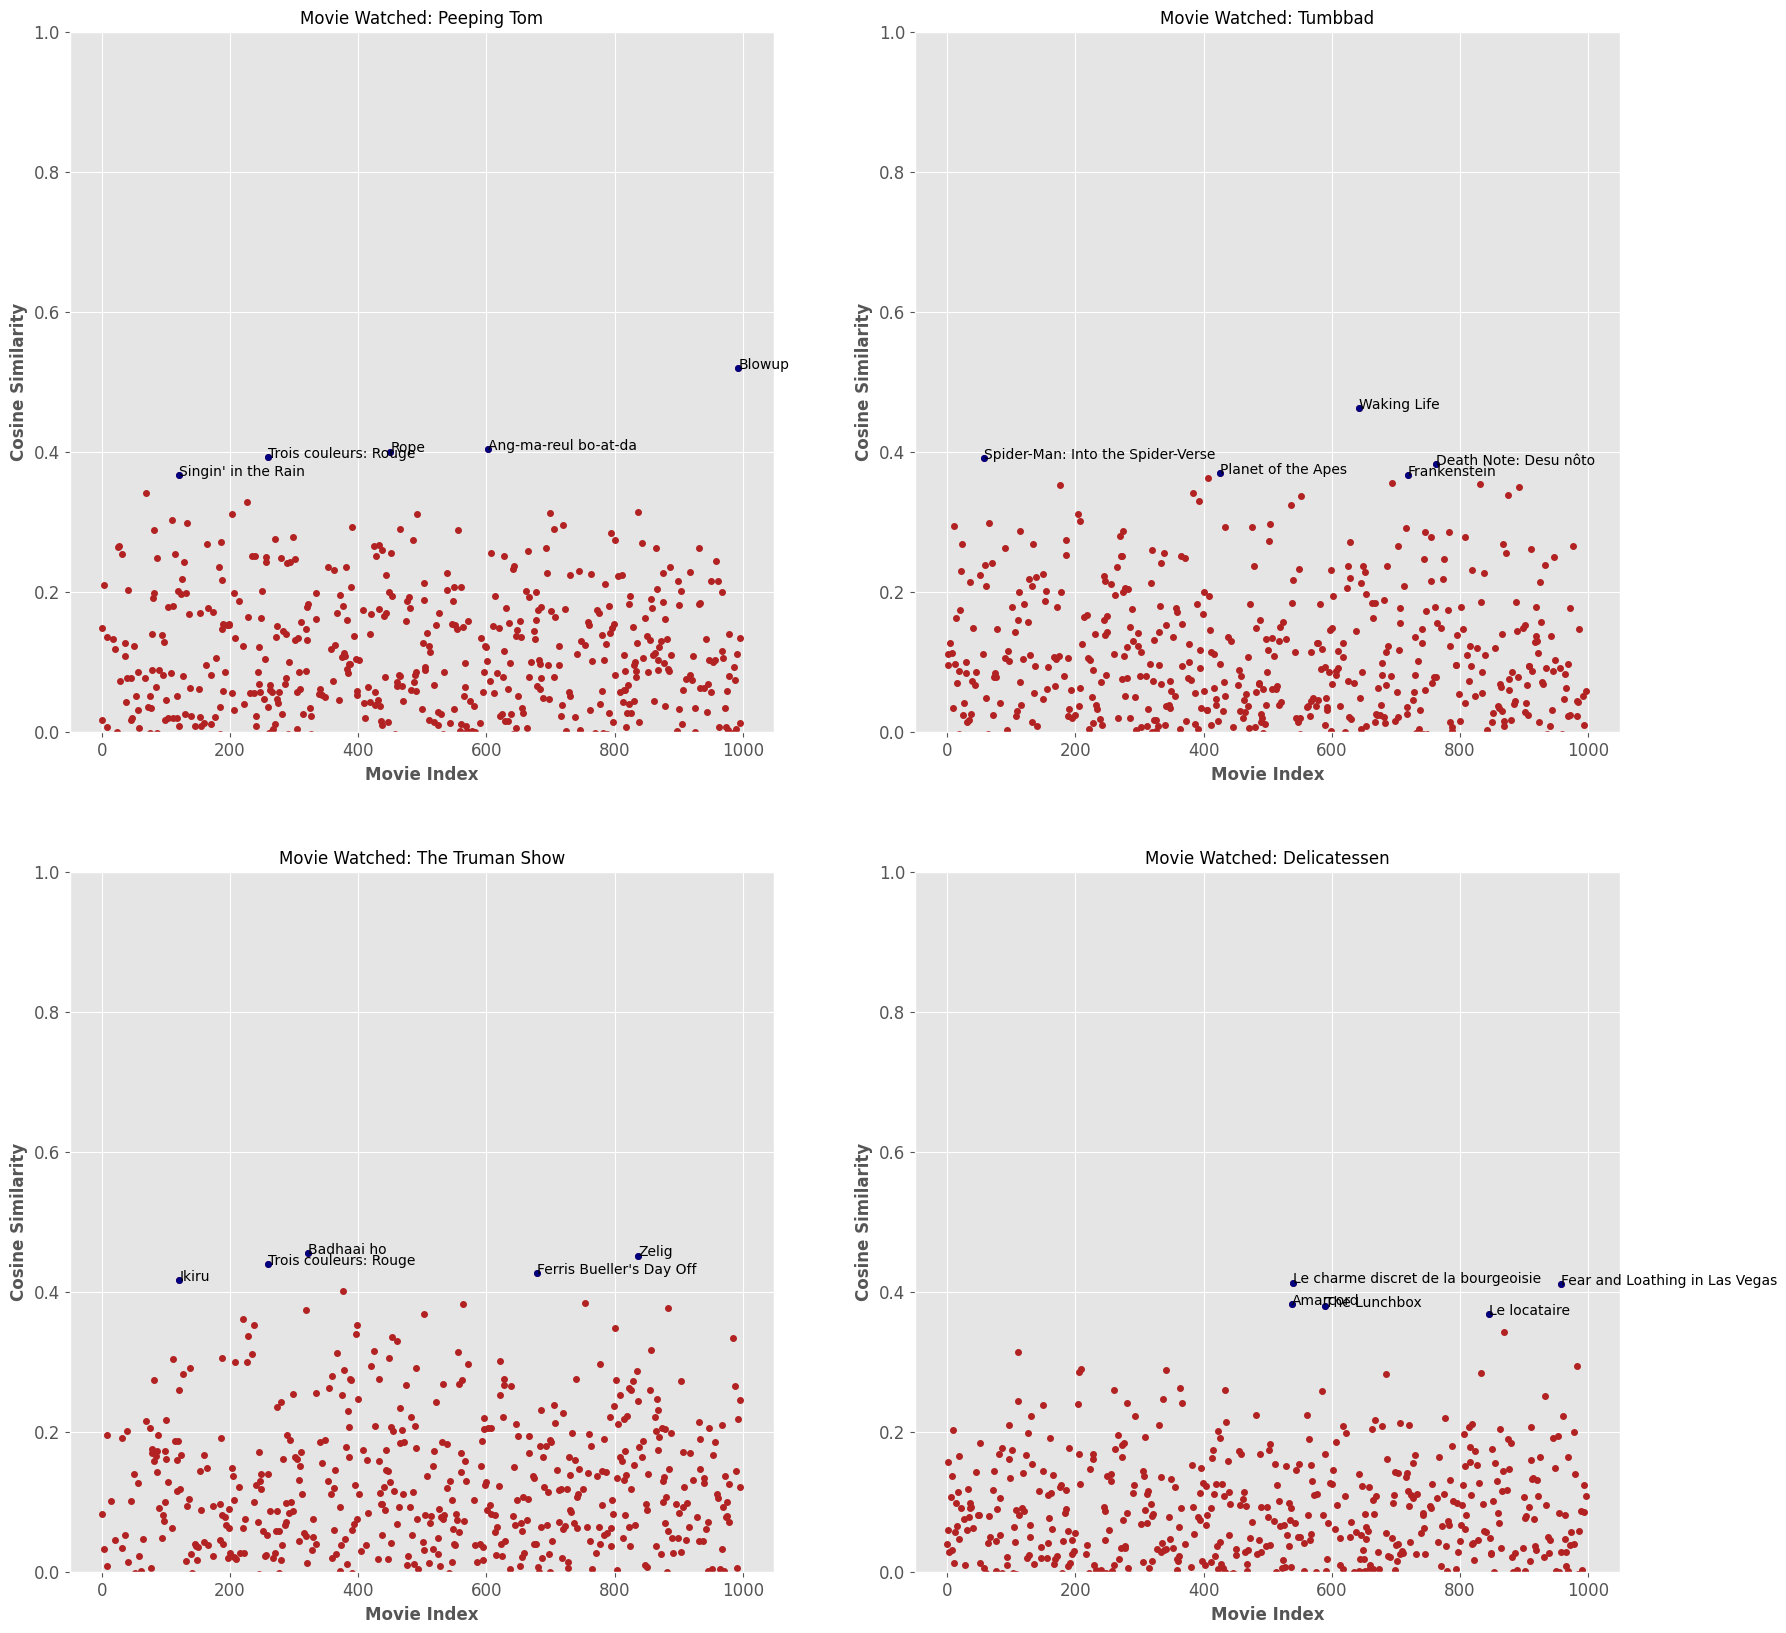

In [16]:
plt.figure(figsize=(20,20))
for q in range(1,5):
  plt.subplot(2,2,q)
  index = np.random.choice(np.arange(0,len(X)))
  to_plot_data = cos_sim_data.drop(index,axis=1)
  plt.plot(to_plot_data.loc[index],'.',color='firebrick')
  recomm_index = give_recommendations(index)
  x = recomm_index['Index']
  y = cos_sim_data.loc[index][x].tolist()
  m = recomm_index['Movies']
  plt.plot(x,y,'.',color='navy',label='Recommended Movies')
  plt.title('Movie Watched: '+data['Series_Title'].loc[index])
  plt.xlabel('Movie Index')
  k=0
  for x_i in x:
    plt.annotate('%s'%(m[k]),(x_i,y[k]),fontsize=10)
    k=k+1

  plt.ylabel('Cosine Similarity')
  plt.ylim(0,1)

In [18]:
give_recommendations(0,True)

The watched movie is this one: The Shawshank Redemption 

The number 1 recommended movie is this one: 12 Angry Men 

The number 1 recommended movie is this one: Crash 

The number 1 recommended movie is this one: Happiness 

The number 1 recommended movie is this one: Amores perros 

The number 1 recommended movie is this one: Hævnen 



{'Movies': array(['12 Angry Men', 'Crash', 'Happiness', 'Amores perros', 'Hævnen'],
       dtype=object),
 'Index': [4, 775, 801, 244, 905]}

In [19]:
give_recommendations(0,False,True)

The plot of the watched movie is this one:
 Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency. 

The plot of the number 1 recommended movie is this one:
 A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence. 

The plot of the number 2 recommended movie is this one:
 Los Angeles citizens with vastly separate lives collide in interweaving stories of race, loss and redemption. 

The plot of the number 3 recommended movie is this one:
 The lives of several individuals intertwine as they go about their lives in their own unique ways, engaging in acts society as a whole might find disturbing in a desperate search for human connection. 

The plot of the number 4 recommended movie is this one:
 A horrific car accident connects three stories, each involving characters dealing with loss, regret, and life's harsh realities, all in the name of love. 

The plot of the numb

{'Movies': array(['12 Angry Men', 'Crash', 'Happiness', 'Amores perros', 'Hævnen'],
       dtype=object),
 'Index': [4, 775, 801, 244, 905]}

In [20]:
give_recommendations(0,True,True)

The watched movie is this one: The Shawshank Redemption 

The number 1 recommended movie is this one: 12 Angry Men 

The number 1 recommended movie is this one: Crash 

The number 1 recommended movie is this one: Happiness 

The number 1 recommended movie is this one: Amores perros 

The number 1 recommended movie is this one: Hævnen 

The plot of the watched movie is this one:
 Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency. 

The plot of the number 1 recommended movie is this one:
 A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence. 

The plot of the number 2 recommended movie is this one:
 Los Angeles citizens with vastly separate lives collide in interweaving stories of race, loss and redemption. 

The plot of the number 3 recommended movie is this one:
 The lives of several individuals intertwine as they go about their lives in their own unique ways,

{'Movies': array(['12 Angry Men', 'Crash', 'Happiness', 'Amores perros', 'Hævnen'],
       dtype=object),
 'Index': [4, 775, 801, 244, 905]}

In [21]:
give_recommendations(0,True,True,True)

The watched movie is this one: The Shawshank Redemption 

The number 1 recommended movie is this one: 12 Angry Men 

The number 1 recommended movie is this one: Crash 

The number 1 recommended movie is this one: Happiness 

The number 1 recommended movie is this one: Amores perros 

The number 1 recommended movie is this one: Hævnen 

The plot of the watched movie is this one:
 Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency. 

The plot of the number 1 recommended movie is this one:
 A jury holdout attempts to prevent a miscarriage of justice by forcing his colleagues to reconsider the evidence. 

The plot of the number 2 recommended movie is this one:
 Los Angeles citizens with vastly separate lives collide in interweaving stories of race, loss and redemption. 

The plot of the number 3 recommended movie is this one:
 The lives of several individuals intertwine as they go about their lives in their own unique ways,

{'Movies': array(['12 Angry Men', 'Crash', 'Happiness', 'Amores perros', 'Hævnen'],
       dtype=object),
 'Index': [4, 775, 801, 244, 905]}

In [22]:
recomm_list = []
for i in range(len(X)):
  recomm_i = give_recommendations(i)
  recomm_list.append(recomm_i['Movies'])
recomm_data = pd.DataFrame(recomm_list,columns=['First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation'])
recomm_data['Watched Movie'] = data['Series_Title']
recomm_data = recomm_data[['Watched Movie','First Recommendation','Second Recommendation','Third Recommendation','Fourth Recommendation','Fifth Recommendation']]

In [23]:
recomm_data.sample(frac=1).head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
291,La battaglia di Algeri,Babam ve Oglum,Pride,Dunkirk,The Last King of Scotland,Hotel Rwanda
999,The 39 Steps,Vikram Vedha,À bout de souffle,Leviafan,True Romance,The Warriors
666,Lat sau san taam,Per qualche dollaro in più,The French Connection,Zootopia,Serbuan maut,The Departed
628,The Curious Case of Benjamin Button,Big Fish,The Last Emperor,The Kid,8½,The Circus
325,Bajrangi Bhaijaan,"Swades: We, the People",Auf der anderen Seite,Haider,Lion,Secrets & Lies


In [24]:
recomm_data.head()

,Watched Movie,First Recommendation,Second Recommendation,Third Recommendation,Fourth Recommendation,Fifth Recommendation
0,The Shawshank Redemption,12 Angry Men,Crash,Happiness,Amores perros,Hævnen
1,The Godfather,Gisaengchung,The Lion King,Scarface,Being There,Scarface: The Shame of the Nation
2,The Dark Knight,Avengers: Infinity War,Avengers: Endgame,The Dark Knight Rises,The Avengers,X-Men: Days of Future Past
3,The Godfather: Part II,Goodfellas,Blow,The Wolf of Wall Street,The Untouchables,The Godfather: Part III
4,12 Angry Men,The Verdict,Witness for the Prosecution,Contratiempo,Anatomy of a Murder,The Shawshank Redemption
